## Analisi dei dati demografici, lessicali e valutazione finale

# Introduzione
In questo notebook, analizzeremo i dati estratti dal CSV ottenuto tramite lo scraping di questo [sito](https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html), insieme ai risultati generati dalle APIs di OpenAI per quanto riguarda l’analisi delle emozioni e della dichiarazione di colpevolezza (*plea status*) espresse nelle loro ultime dichiarazioni. L’obiettivo è esplorare i dati da diverse prospettive per ottenere insight significativi. 

L’analisi sarà suddivisa in **tre sezioni principali**:
1. **Dati demografici**: esamineremo i dati demografici dei condannati a morte, come età, livello di istruzione, etnia, e la distribuzione temporale e geografica delle esecuzioni.
2. **Dati lessicali**: analizzeremo il contenuto testuale delle loro ultime dichiarazioni e i riassunti delle cause della loro condanna, con un focus sulle ricorrenze linguistiche.
3. **Valutazione finale**: confronteremo i risultati ottenuti dall’analisi delle emozioni e del *plea status* predetti da GPT con il gold standard fornito. Calcoleremo metriche di accuratezza, come la percentuale di corrispondenza tra emozioni predette e attese (**Emotion Match**) e il tasso di correttezza di riconoscimento del *plea status* (**Correct Plea**), per valutare la qualità del modello e trarre conclusioni sull’affidabilità dell’analisi.

Ogni sezione è progettata per approfondire un aspetto specifico del dataset e offrire una visione integrata dei dati, combinando analisi descrittive, linguistiche e valutative.

# Sezione 1: Analisi dei Dati Demografici
Questa sezione esplora le informazioni demografiche presenti nel dataset ottenuto.
Calcoleremo in particolare:
1. età media dei condannati a morte (al momento della morte);
2. anno con maggiori/minori esecuzioni e la media di esecuzioni in un anno;
3. distribuzione di frequenza delle etnie tra i condannati a morte;
4. distribuzione di frequenza dei distretti di appartenenza dei condannati a morte;
5. livello di istruzione medio tra i condannati a morte.

Cominciamo con l'importazione delle librerie necessarie e del DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("scraping_executed_inmates.csv", encoding="utf-8", sep=",")

/Users/ericasolinas/anaconda3/envs/PROGRAMMAZIONE/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### **1. Calcolo dell'età media dei condannati a morte (al momento della morte)**

L'età media dei giustiziati è di 40.2 anni.


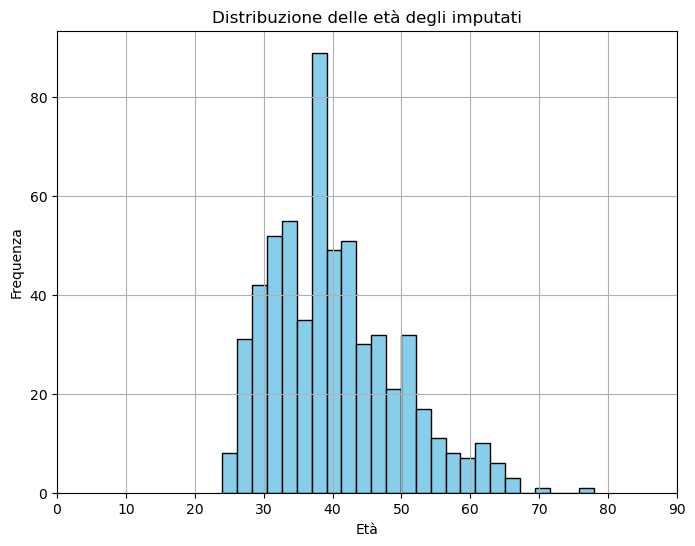

In [2]:
# calcoliamo l'età media
mean_age = df["Age"].mean()
rounded_mean = round(mean_age, 2)
print(f"L'età media dei giustiziati è di {rounded_mean} anni.")

# creiamo il grafico relativo
plt.figure(figsize=(8, 6))
df["Age"].hist(bins=25, color="skyblue", edgecolor="black")
plt.title("Distribuzione delle età degli imputati")
plt.xlabel("Età")
plt.ylabel("Frequenza")
ticks = range(0, 100, 10)  # Etichette ogni 5 anni (0, 5, 10, ..., 95)
plt.xticks(ticks=ticks, labels=[str(tick) for tick in ticks], rotation=0)
plt.savefig("grafico_eta_media.png")
plt.show()
plt.close()

##### **2. Calcolo dell'anno con maggiori e minori esecuzioni e la media di esecuzioni in un anno**

Ogni anno si ha una media di 14 esecuzioni
L'anno in cui ci sono state meno esecuzioni è il 1982 con 1 esecuzioni.
L'anno in cui ci sono state più esecuzioni è 2000 con 40 esecuzioni.


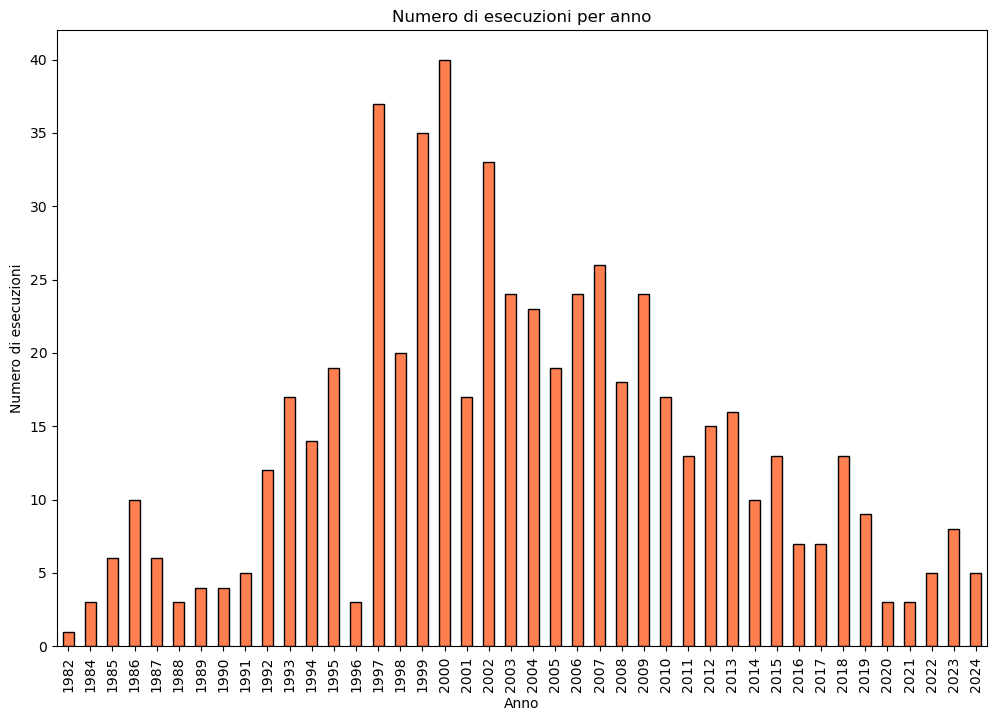

In [3]:
# calcoliamo la distribuzione di frequenza degli anni
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
most_executions_year = df['Year'].value_counts().idxmax()
num_executions = df['Year'].value_counts().max()
least_executions_year = df['Year'].value_counts().idxmin()
num_executions_2 = df['Year'].value_counts().min()

media_esecuzioni_anno = df['Year'].value_counts().mean()
round_media_anno = round(media_esecuzioni_anno)
print(f"Ogni anno si ha una media di {round_media_anno} esecuzioni")
print(f"L'anno in cui ci sono state meno esecuzioni è il {least_executions_year} con {num_executions_2} esecuzioni.")
print(f"L'anno in cui ci sono state più esecuzioni è {most_executions_year} con {num_executions} esecuzioni.")

# creiamo il grafico
plt.figure(figsize=(12, 8))
df['Year'].value_counts().sort_index().plot(kind="bar", color="coral", edgecolor="black")
plt.title("Numero di esecuzioni per anno")
plt.xlabel("Anno")
plt.ylabel("Numero di esecuzioni")
plt.savefig("grafico_esecuzioni_anno.png")
plt.show()
plt.close()

##### **3. Distribuzione di frequenza delle etnie dei condannati a morte**

Lista ordinata delle etnie: Ethnicity
White       263
Black       211
Hispanic    113
Other         4
Name: count, dtype: int64


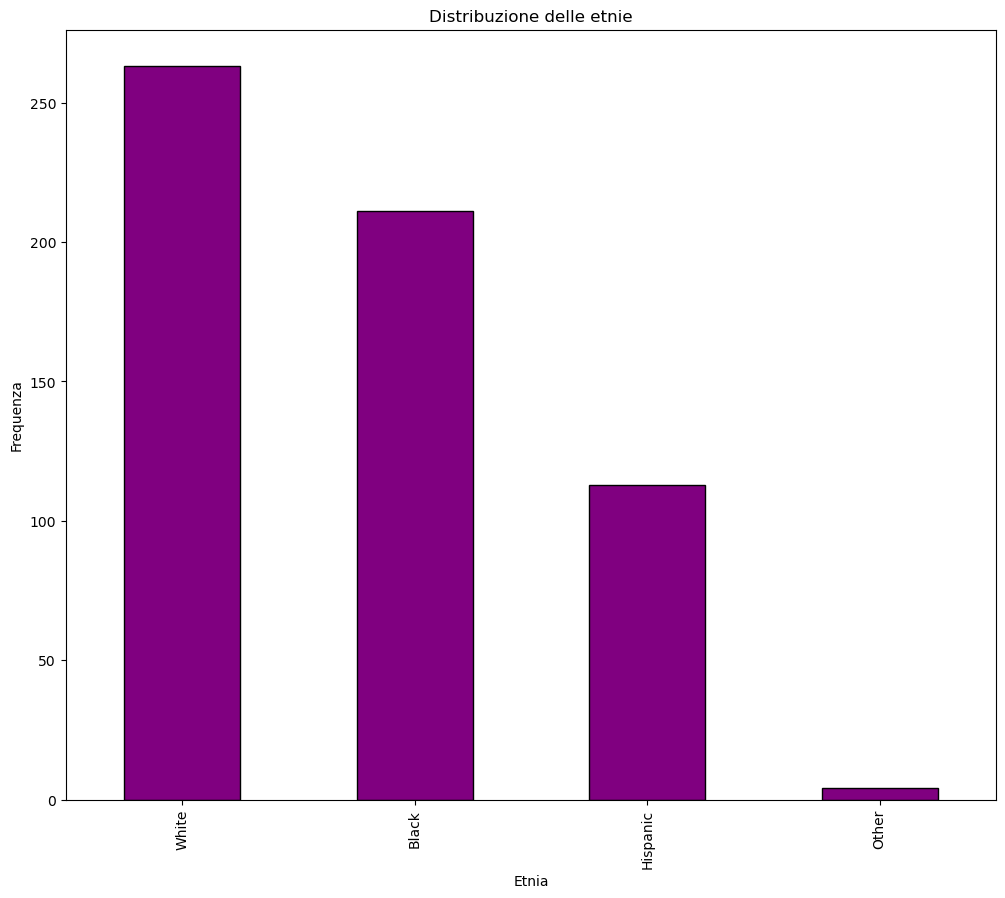

In [4]:
# calcoliamo la distribuzione
freq_ethnicity = df['Ethnicity'].value_counts()
print("Lista ordinata delle etnie:", freq_ethnicity)

# creiamo il grafico
plt.figure(figsize=(12, 10))
freq_ethnicity.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Distribuzione delle etnie")
plt.xlabel("Etnia")
plt.ylabel("Frequenza")
plt.savefig("grafico_etnie.png")
plt.show()
plt.close()

##### **4. Distribuzione di frequenza dei distretti di appartenenza dei condannati a morte**
Calcoliamo il:
- distretto più frequente
- distretto meno frequente
- i 10 distretti più frequenti

Il distretto più frequente è 'Harris' con 135 occorrenze.
Il distretto meno frequente è 'Wood' con 1 occorrenze.
Lista ordinata dei distretti: County
Harris         135
Dallas          65
Bexar           46
Tarrant         45
Nueces          17
              ... 
Coryell          1
San Jacinto      1
Nacogdoches      1
Brown            1
Hardin           1
Name: count, Length: 95, dtype: int64


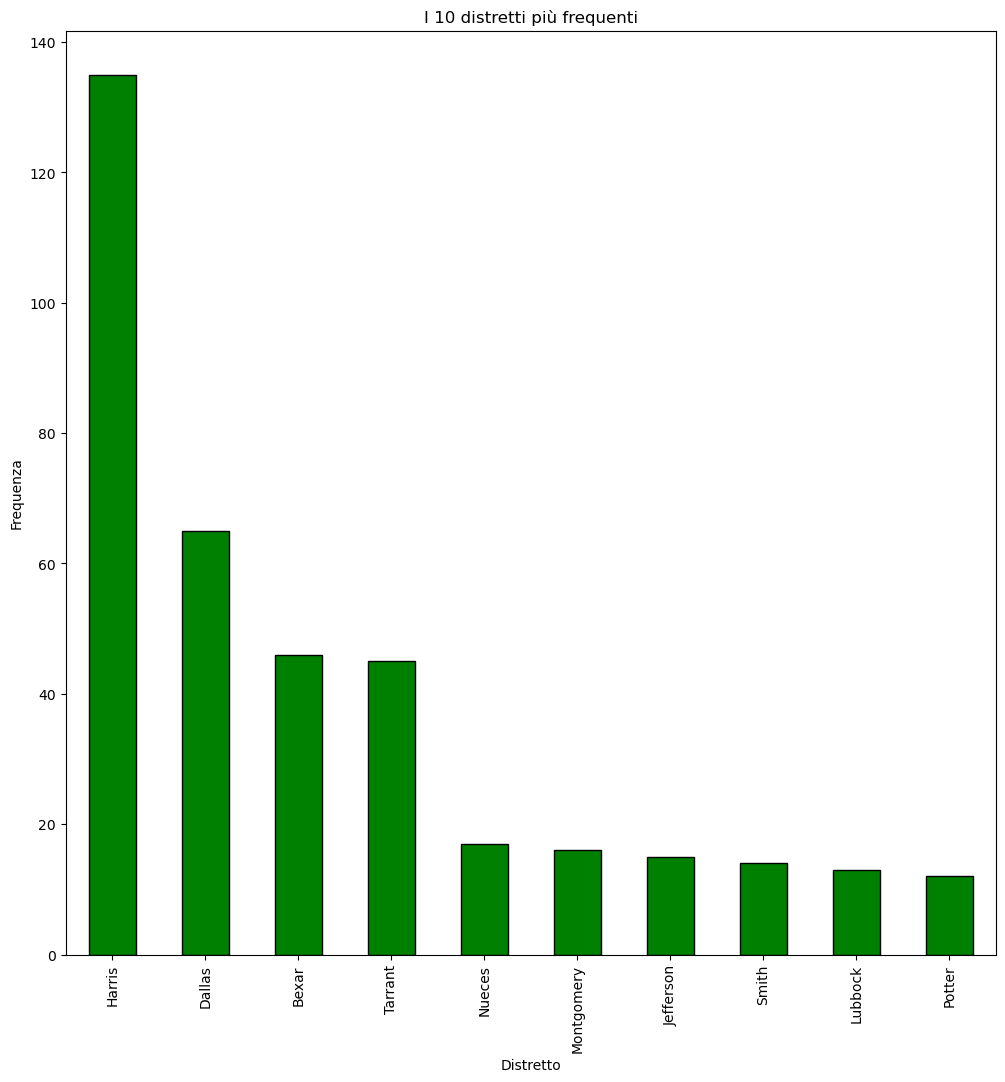

In [5]:
# calcolo dei distretti più e meno frequenti
most_frequent_county = df['County'].value_counts().idxmax()
num_county = df['County'].value_counts().max()
least_freq_county = df['County'].value_counts().idxmin()
num_county_2 = df['County'].value_counts().min()

print(f"Il distretto più frequente è '{most_frequent_county}' con {num_county} occorrenze.")
print(f"Il distretto meno frequente è '{least_freq_county}' con {num_county_2} occorrenze.")
freq_county= df['County'].value_counts()
print("Lista ordinata dei distretti:", freq_county)

# creazione del grafico con i 10 distretti più frequenti
plt.figure(figsize=(12, 12))
df['County'].value_counts().head(10).plot(kind="bar", color="green", edgecolor="black")
plt.title("I 10 distretti più frequenti")
plt.xlabel("Distretto")
plt.ylabel("Frequenza")
plt.savefig("grafico_distretti.png")
plt.show()
plt.close()

##### **5. Livello di istruzione medio dei condannati a morte**
Attenzione: alcuni dei valori presenti nella colonna "Education Level" sono stati estratti utilizzando un OCR, che non ha funzionato perfettamente, producendo alcuni outliers che notiamo anche nel grafico. Ad ogni modo, notiamo che il valore più frequente è **12**, ovvero *12th grade*, che corrisponderebbe al quinto anno di superiori in Italia. 

Il livello di istruzione più frequente è: 12.0


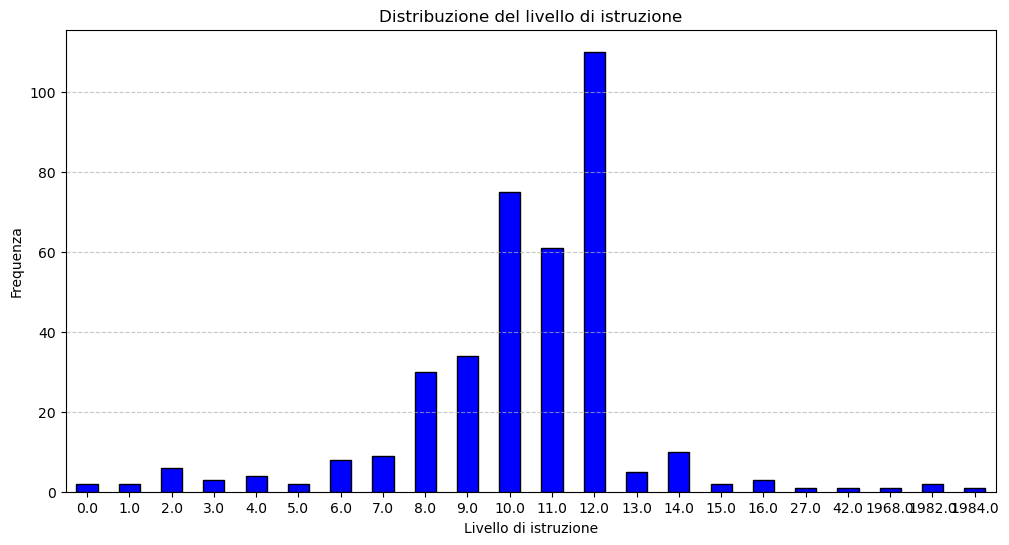

In [6]:
# creiamo una funzione per estrarre solo i valori numerici dalla colonna
def extract_numeric_education(level):
    if pd.isna(level):  
        return None
    match = re.search(r'\d+', str(level))  
    return int(match.group()) if match else None

df["Education_Level_Num"] = df["Education Level"].apply(extract_numeric_education)

# Calcola la frequenza di ciascun livello di istruzione numerico 
education_counts = df["Education_Level_Num"].value_counts().sort_index()
most_frequent_education_level = education_counts.idxmax()
print(f"Il livello di istruzione più frequente è: {most_frequent_education_level}")

plt.figure(figsize=(12, 6))
education_counts.plot(kind="bar", color="blue", edgecolor="black")
plt.xticks(ticks=range(len(education_counts)), labels=education_counts.index, rotation=0)
plt.title("Distribuzione del livello di istruzione")
plt.xlabel("Livello di istruzione")
plt.ylabel("Frequenza")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("grafico_istruzione_bar.png")
plt.show()
plt.close()


# Sezione 2: Analisi dei Dati Lessicali

Questa sezione esplora le sezioni relastive alle ultime dichiarazioni dei condannati a morte (**Last Statement**) e il riassunto del reato commesso (**Summary of Incident**). 

Cominciamo con l'importazione delle librerie necessarie e con il caricamento del DataFrame.

In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import re
import string

df = pd.read_csv("scraping_executed_inmates.csv", encoding="utf-8", sep=",")

### Analisi lessicale sezione "Last Statement"
Dal momento che all'interno del dataset ci sono delle frasi non interessanti dal punto di vista lessicale, ho deciso di non tenerle in considerazione in questa analisi per non comprometterne i risultati finali. Si tratta di frasi che dichiarano che l'imputato si è rifiutato di rilasciare un'ultima dichiarazione: non si è usata sempre la stessa all'interno del dataset, quindi attraverso una ricerca ho raccolto tutte quelle che sono state usate e le ho raccolte. 
In questa sezione analizzeremo anche i token e i bigrammi più frequenti. 

In [8]:
# Frasi da escludere
exclude_statements = [
    "no statement given.",
    "no last statement was given.",
    "no statement was made.",
    "this inmate declined to make a last statement."
]

A questo punto possiamo procedere con la normalizzazione e la tokenizzazione del resto delle frasi del dataset. 

In [9]:
# Funzione di normalizzazione
def normalize(txt):
    if pd.isna(txt) or any(excluded in txt.lower() for excluded in exclude_statements):  
        return ""
    txt = txt.lower()
    txt = txt.replace("’", "")
    txt = re.sub(r'\d+', '', txt)  
    for char in string.punctuation:
        txt = txt.replace(char, '')
    return txt

# Applica la normalizzazione
df['cleaned_text'] = df['Last Statement'].apply(normalize)

# Tokenizzazione
def tokenizzazione(testo: str) -> list:
    if isinstance(testo, float):
        return []
    stopw = set(stopwords.words('english'))
    parole = word_tokenize(testo)
    token = [parola for parola in parole if parola.lower() not in stopw and parola not in string.punctuation]
    return token

# Applica la tokenizzazione
df['tokens'] = df['cleaned_text'].apply(tokenizzazione)

# Unisci tutti i token in una lista
all_tokens = [token for sublist in df['tokens'] for token in sublist]


Passiamo a visionare i token e i bigrammi più frequenti.

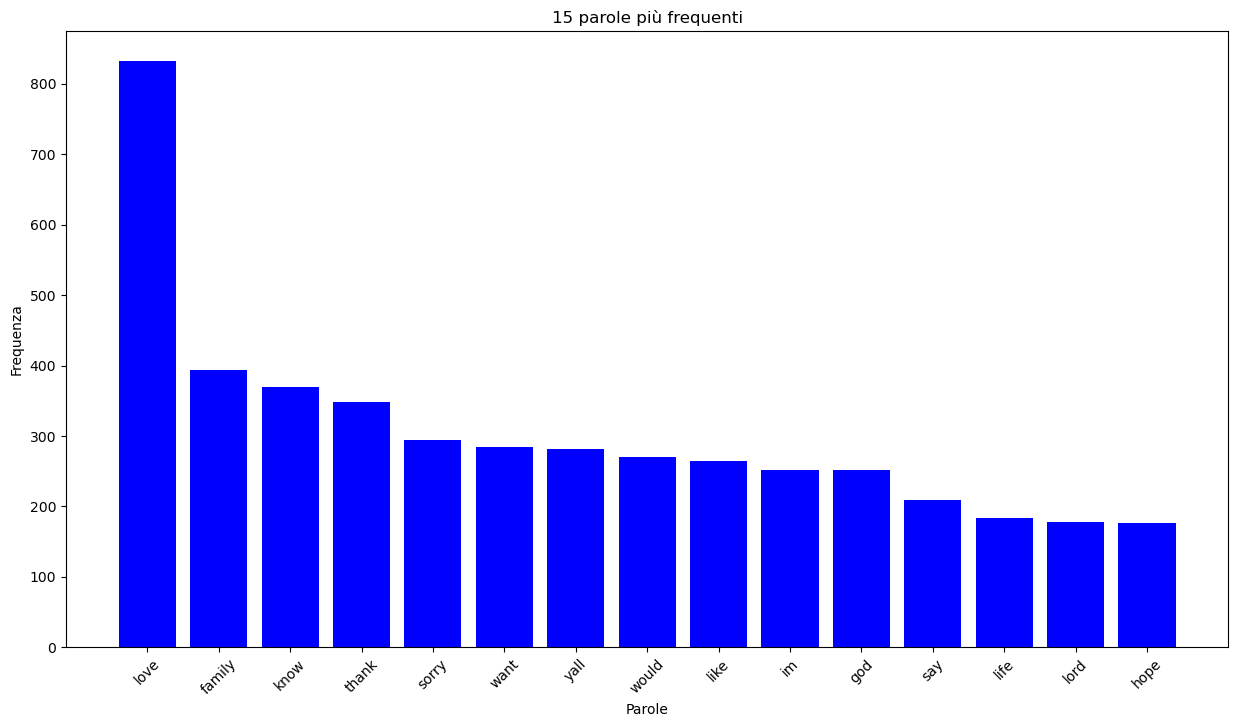

In [10]:
# funzione per le parole più frequenti
def plot_last_most_common_words(tokens, n=15):
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(n)
    
    words = [word for word, freq in common_words]
    freqs = [freq for word, freq in common_words]
    
    plt.figure(figsize=(15, 8))
    plt.bar(words, freqs, color='blue')
    plt.xlabel('Parole')
    plt.ylabel('Frequenza')
    plt.title(f'{n} parole più frequenti')
    plt.xticks(rotation=45)
    plt.savefig('last_grafico_parole_frequenti.png')
    plt.show()
    plt.close()

plot_last_most_common_words(all_tokens, n=15)

# creiamo il grafico con le 15 parole più frequenti

# creiamo un file CSV con tutti i token in ordine di frequenza 
word_freq = Counter(all_tokens)
common_words = word_freq.most_common()
word_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
word_df.to_csv("last_most_frequent_words.csv", index=False)

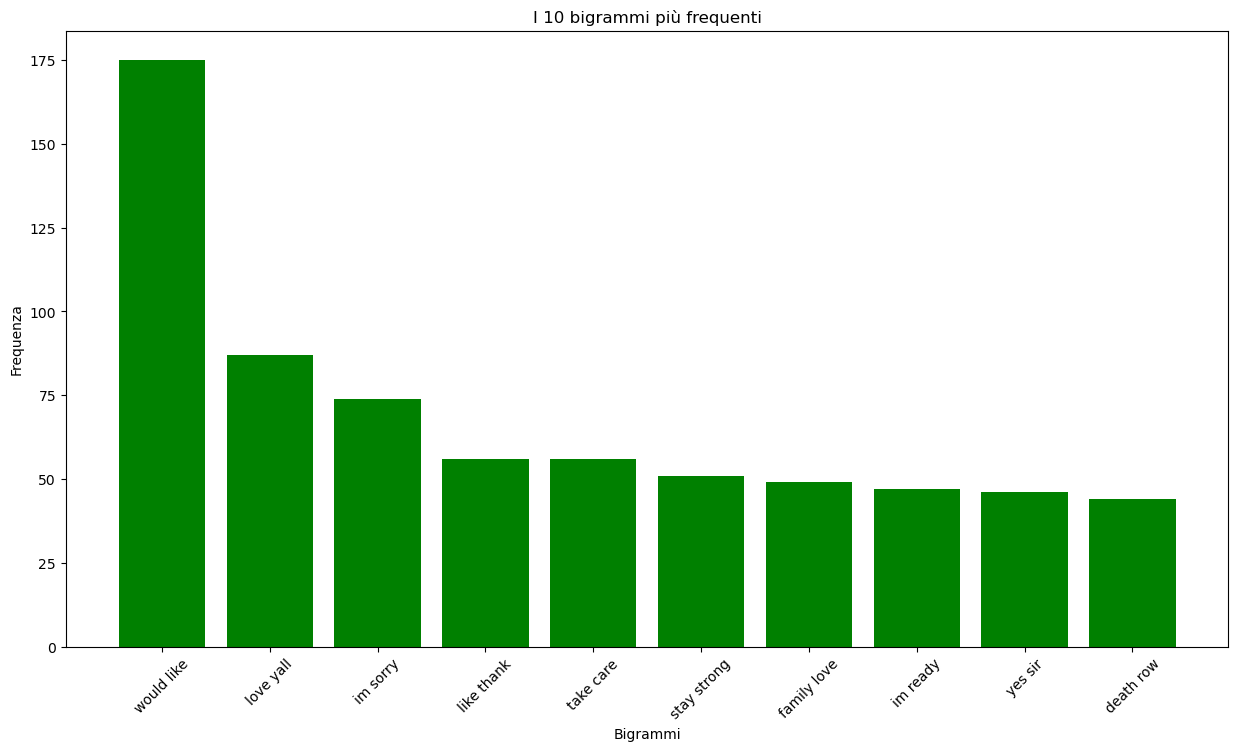

In [11]:
# creiamo una funzione per le frequenze dei bigrammi
def plot_last_bigram_frequencies(tokens, n=10):
    bigrams = list(nltk.bigrams(tokens))
    bigram_freq = Counter(bigrams)
    common_bigrams = bigram_freq.most_common(n)
    
    bigrams = [f'{bigram[0]} {bigram[1]}' for bigram, freq in common_bigrams]
    freqs = [freq for bigram, freq in common_bigrams]

    # creiamo il grafico con i 10 bigrammi più frequenti
    plt.figure(figsize=(15, 8))
    plt.bar(bigrams, freqs, color='green')
    plt.xlabel('Bigrammi')
    plt.ylabel('Frequenza')
    plt.title('I 10 bigrammi più frequenti')
    plt.xticks(rotation=45)
    plt.savefig('last_grafico_bigrammi.png')
    plt.show()
    plt.close()

plot_last_bigram_frequencies(all_tokens, n=10)

# creiamo un file CSV con tutti i bigrammi ordinati per frequenza
bigrams = list(nltk.bigrams(all_tokens))
bigram_freq = Counter(bigrams)
common_bigrams = bigram_freq.most_common()
bigram_df = pd.DataFrame(common_bigrams, columns=["Bigram", "Frequency"])
bigram_df.to_csv("last_most_frequent_bigrams.csv", index=False)

### Analisi lessicale sezione "Summary of Incident"
Ripetiamo ciò che abbiamo fatto finora ma per la sezione **Summary of Incident**. 

Iniziamo di nuovo con la normalizzazione e la tokenizzazione del testo.

In [12]:
# applichiamo la funzione di normalizzazione precendemente creata
df['cleaned_text'] = df['Summary of Incident'].apply(normalize)

# applichiamo la funzione di tokenizzazione precedentemente creata
df['tokens'] = df['cleaned_text'].apply(tokenizzazione)

all_tokens = [token for sublist in df['tokens'] for token in sublist]

Iniziamo con l'analisi dei token più frequenti.

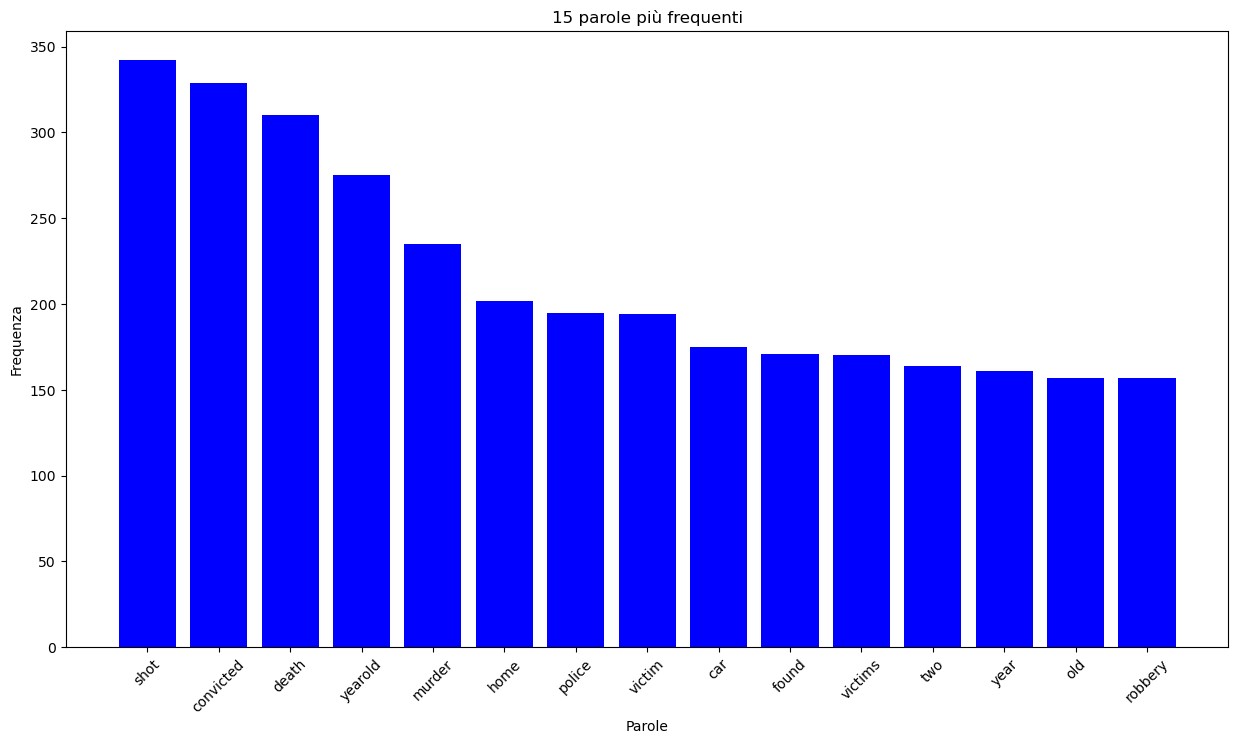

In [13]:
# funzione per le parole più frequenti
def plot_summary_most_common_words(tokens, n=15):
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(n)
    
    words = [word for word, freq in common_words]
    freqs = [freq for word, freq in common_words]
    
    plt.figure(figsize=(15, 8))
    plt.bar(words, freqs, color='blue')
    plt.xlabel('Parole')
    plt.ylabel('Frequenza')
    plt.title(f'{n} parole più frequenti')
    plt.xticks(rotation=45)
    plt.savefig('summary_grafico_parole_frequenti.png')
    plt.show()
    plt.close()

plot_summary_most_common_words(all_tokens, n=15)

# creiamo un file CSV con tutti i token in ordine di frequenza 
word_freq = Counter(all_tokens)
common_words = word_freq.most_common()
word_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
word_df.to_csv("summary_most_frequent_words.csv", index=False)

Proseguiamo con i bigrammi.

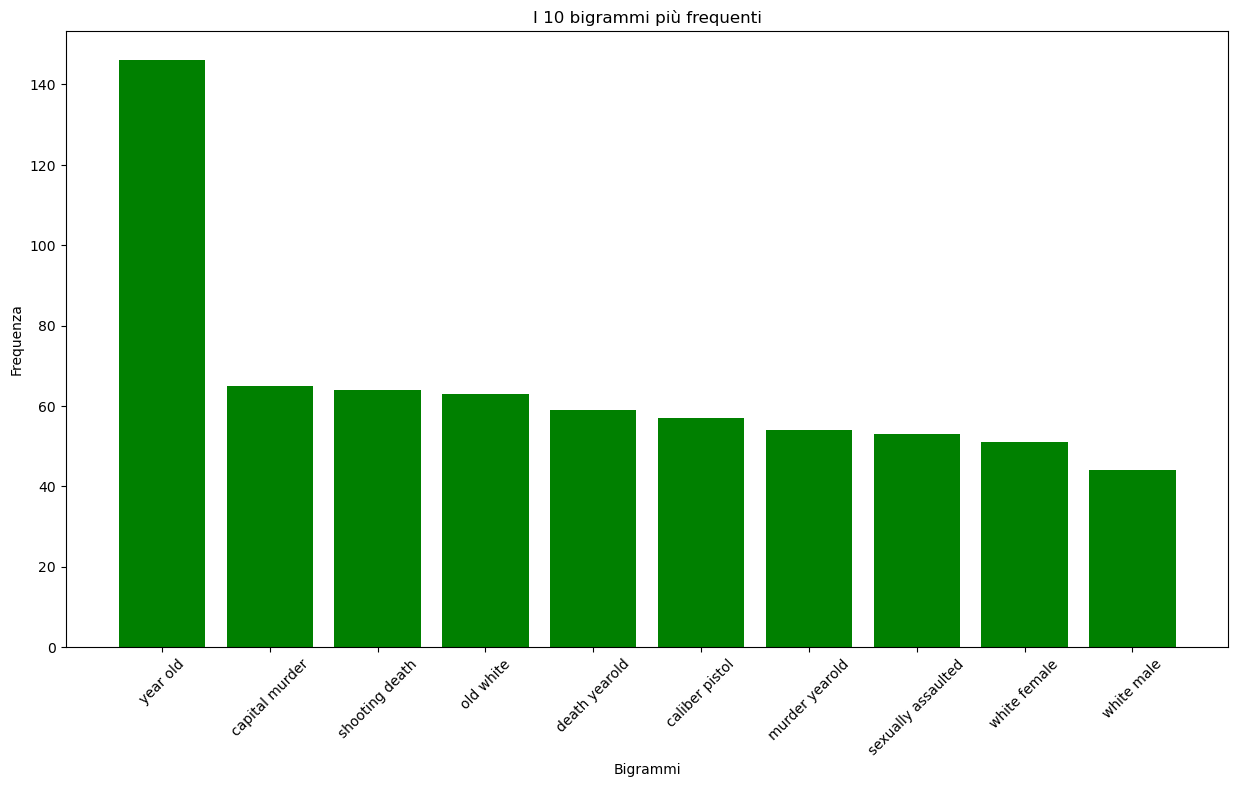

In [14]:
# creiamo una funzione per le frequenze dei bigrammi
def plot_summary_bigram_frequencies(tokens, n=10):
    bigrams = list(nltk.bigrams(tokens))
    bigram_freq = Counter(bigrams)
    common_bigrams = bigram_freq.most_common(n)
    
    bigrams = [f'{bigram[0]} {bigram[1]}' for bigram, freq in common_bigrams]
    freqs = [freq for bigram, freq in common_bigrams]

    # creiamo il grafico con i 10 bigrammi più frequenti
    plt.figure(figsize=(15, 8))
    plt.bar(bigrams, freqs, color='green')
    plt.xlabel('Bigrammi')
    plt.ylabel('Frequenza')
    plt.title('I 10 bigrammi più frequenti')
    plt.xticks(rotation=45)
    plt.savefig('summary_grafico_bigrammi.png')
    plt.show()
    plt.close()

plot_summary_bigram_frequencies(all_tokens, n=10)


# creiamo un file CSV con tutti i bigrammi ordinati per frequenza
bigrams = list(nltk.bigrams(all_tokens))
bigram_freq = Counter(bigrams)
common_bigrams = bigram_freq.most_common()
bigram_df = pd.DataFrame(common_bigrams, columns=["Bigram", "Frequency"])
bigram_df.to_csv("summary_most_frequent_bigrams.csv", index=False)

# Sezione 3: Valutazione Finale
In questa sezione confronteremo i risultati ottenuti dall’analisi delle emozioni e del *plea status* predetti da GPT con il gold standard fornito. Calcoleremo metriche di accuratezza, come la percentuale di corrispondenza tra emozioni predette e attese (**Emotion Match**) e il tasso di correttezza di riconoscimento del *plea status* (**Correct Plea**), per valutare la qualità del modello e trarre conclusioni sull’affidabilità dell’analisi.

Iniziamo con l'importazione dei moduli necessari. Il codice per la creazione del CSV *"evaluation_annotated.csv"*, ovvero per la creazione del CSV con l'annotazione del gold standard, è presente nel file *evaluation.py*.

In [23]:
import csv

input_csv = "evaluation_annotated.csv"
output_csv = "evaluation_results.csv"

A questo punto creiamo una funzione per calcolare la percentuale di emozioni predette che coincidono con il gold standard e una funzione che valuta ogni singola riga, che applica la funzione di *emotion match* e che verifica la correttezza del *plea status* predetto dal modello.

In [24]:
def calculate_emotion_match(gold_emotions, predicted_emotions):
    """
    Calcola la percentuale di emozioni predette che coincidono con il gold standard.
    """
    gold_set = set(gold_emotions)
    predicted_set = set(predicted_emotions)
    intersection = gold_set & predicted_set
    if len(gold_set) == 0:  # Evita divisioni per zero
        return 0
    return len(intersection) / len(gold_set) * 100

def evaluate_row(row):
    """
    Valuta una singola riga, confrontando il gold standard con le predizioni del modello.
    """
    gold_emotions = [emotion.strip() for emotion in row["Gold Emotions"].split(",")]
    predicted_emotions = [emotion.strip() for emotion in row["Predicted Emotion"].split(",")]
    
    #  Emotion Match %
    emotion_match = calculate_emotion_match(gold_emotions, predicted_emotions)
    
    # Correct Plea?
    correct_plea = row["Gold Plea Status"].strip().lower() == row["Predicted Plea Status"].strip().lower()
    
    return {
        "Emotion Match %": round(emotion_match, 2),
        "Correct Plea?": correct_plea
    }

Adesso creiamo un nuovo CSV in cui inserire i risultati ottenuti riga per riga e calcoliamo anche le percentuali generali relative all'*emotion match* e alla correttezza del *plea status* predetto. In questo modo possiamo vedere e valutare sia le percentuali di correttezza relative a ogni riga del dataset, sia quelle generali.

In [25]:
with open(input_csv, "r", encoding="utf-8") as infile:
    reader = csv.DictReader(infile, delimiter=";")
    rows = list(reader)

# prepariamo le righe di output con le valutazioni
output_rows = []
total_emotion_match = 0
total_correct_plea = 0
total_rows = len(rows)

for row in rows:

    evaluation = evaluate_row(row)
    
    # aggiungiamo i risultati alla riga originale
    row.update(evaluation)
    output_rows.append(row)
    
    # sommiamo i valori per il calcolo finale
    total_emotion_match += evaluation["Emotion Match %"]
    total_correct_plea += 1 if evaluation["Correct Plea?"] else 0

# calcoliamo la percentuale media per Emotion Match e Correct Plea
average_emotion_match = total_emotion_match / total_rows
percentage_correct_plea = (total_correct_plea / total_rows) * 100

fieldnames = output_rows[0].keys()

# scriviamo i risultati in un nuovo file CSV
with open(output_csv, "w", encoding="utf-8", newline="") as outfile:
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(output_rows)

print(f"Valutazione completata! I risultati sono stati salvati in '{output_csv}'.")
print(f"Percentuale media di Emotion Match: {average_emotion_match:.2f}%")
print(f"Percentuale di righe con Correct Plea: {percentage_correct_plea:.2f}%")

Valutazione completata! I risultati sono stati salvati in 'evaluation_results.csv'.
Percentuale media di Emotion Match: 68.64%
Percentuale di righe con Correct Plea: 81.36%


Analizziamo anche quali sono le emozioni più frequenti, sia tra quelle predette dal modello che tra quelle annotate manualmente. Notiamo sin da subito una predominanza di *love* in entrambi i grafici. 

Prime 10 emozioni più frequenti (Predicted):
Predicted Emotion
love           28
hope           26
remorse        20
gratitude      20
acceptance     13
forgiveness    12
regret         11
silence        10
defiance        6
anger           5
Name: count, dtype: int64


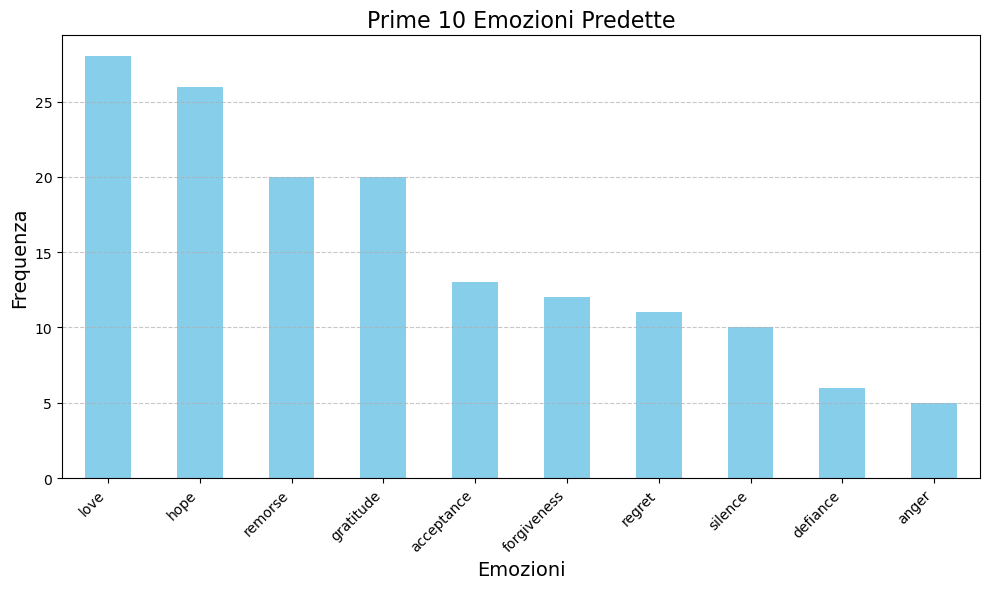

Prime 10 emozioni più frequenti (Gold Standard):
Gold Emotions
love              26
gratitude         17
hope              16
remorse           13
regret             8
forgiveness        7
anger              5
defiance           4
resignation        3
disappointment     3
Name: count, dtype: int64


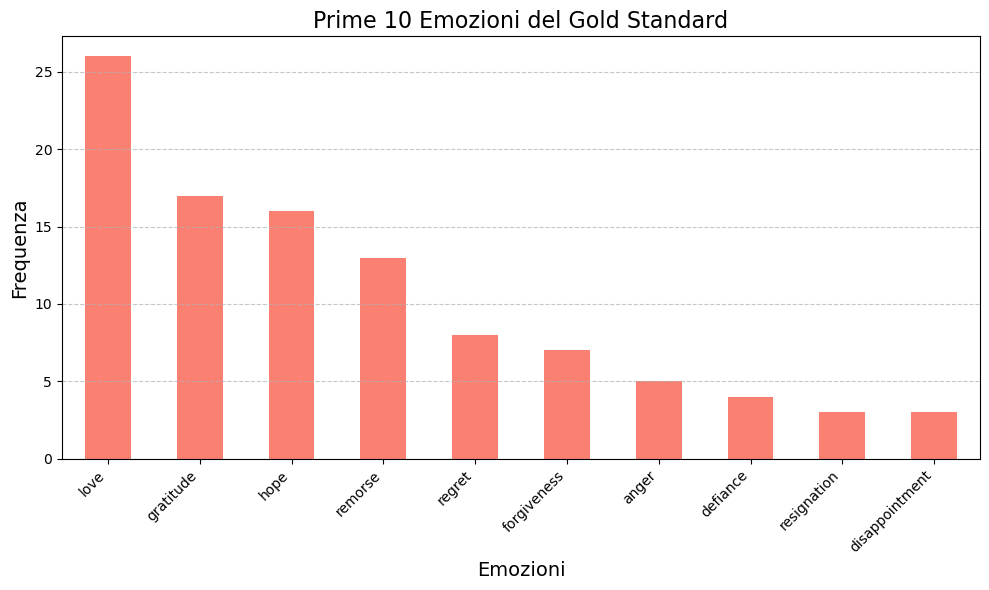

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'evaluation_results.csv'  
data = pd.read_csv(file_path)

def count_individual_emotions(column):
    # Unisci tutte le emozioni in una singola lista
    all_emotions = column.dropna().str.split(',').explode()  
    all_emotions = all_emotions.str.strip()
   
    return all_emotions.value_counts()


emotion_predicted_freq = count_individual_emotions(data['Predicted Emotion']).head(10)
emotion_gold_freq = count_individual_emotions(data['Gold Emotions']).head(10)

# creiamo il grafico
def plot_emotion_frequencies(frequencies, title, color):
    plt.figure(figsize=(10, 6))
    frequencies.plot(kind='bar', color=color)
    plt.title(title, fontsize=16)
    plt.ylabel("Frequenza", fontsize=14)
    plt.xlabel("Emozioni", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


print("Prime 10 emozioni più frequenti (Predicted):")
print(emotion_predicted_freq)
plot_emotion_frequencies(emotion_predicted_freq, "Prime 10 Emozioni Predette", color='skyblue')

print("Prime 10 emozioni più frequenti (Gold Standard):")
print(emotion_gold_freq)
plot_emotion_frequencies(emotion_gold_freq, "Prime 10 Emozioni del Gold Standard", color='salmon')

Calcoliamo anche quanti condannati si dichiarano colpevoli, innocenti o non lo specificano, sia tra quelli predetti dal modello, sia tra le annotazioni del Gold Standard e consideriamo eventuali differenze tra i due grafici. 

Prime 10 categorie di stato delle dichiarazioni più frequenti (Predicted):
Predicted Plea Status
unspecified    51
guilty          6
not guilty      2
Name: count, dtype: int64


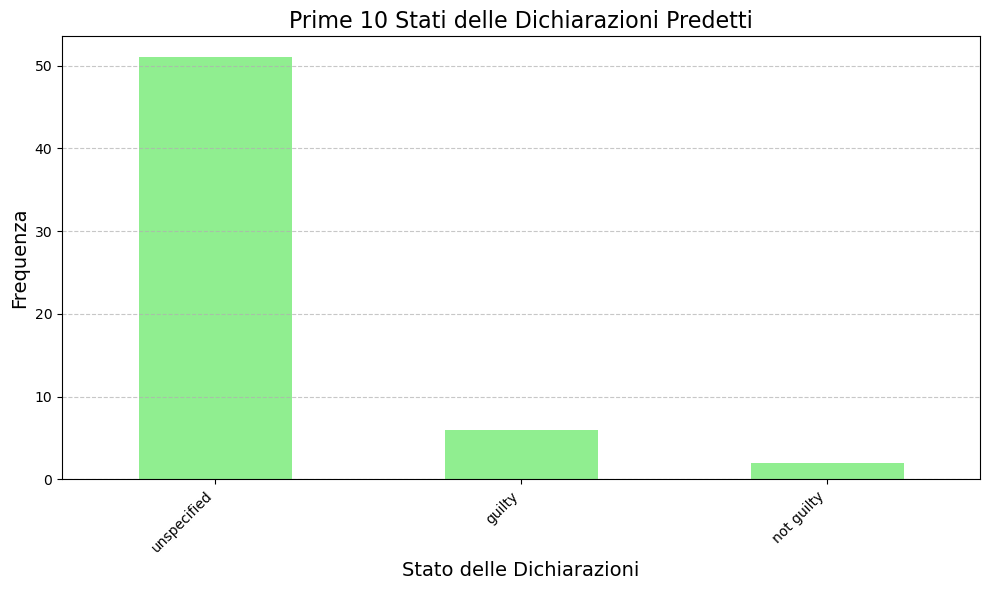

Prime 10 categorie di stato delle dichiarazioni più frequenti (Gold Standard):
Gold Plea Status
unspecified    40
guilty         15
not guilty      4
Name: count, dtype: int64


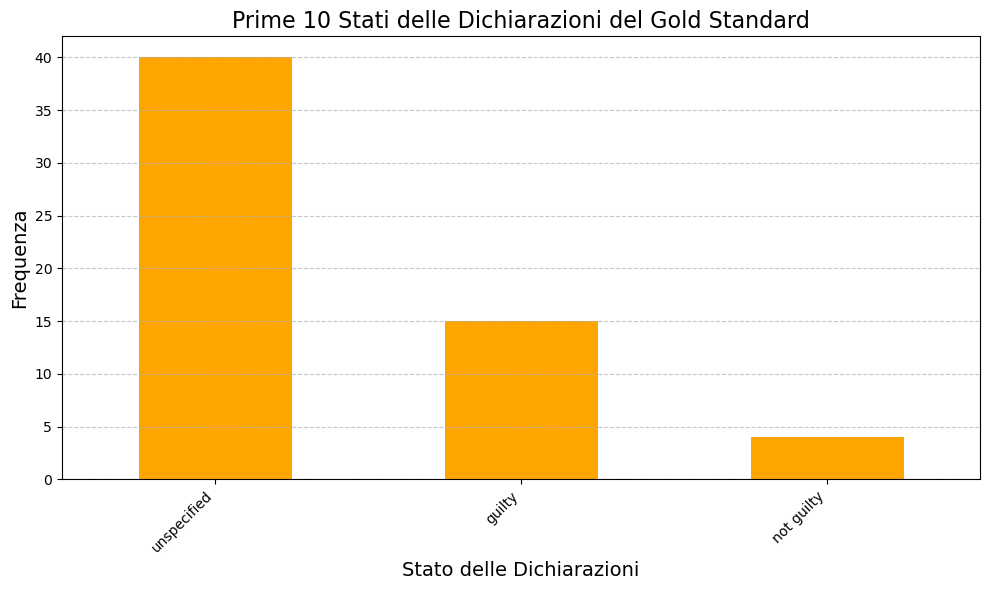

In [27]:

def count_plea_status(column):
    # Unisci tutti gli stati delle dichiarazioni in una singola lista
    all_statuses = column.dropna().str.split(',').explode()  
    all_statuses = all_statuses.str.strip()
    
    return all_statuses.value_counts()


plea_predicted_freq = count_plea_status(data['Predicted Plea Status']).head(10)
plea_gold_freq = count_plea_status(data['Gold Plea Status']).head(10)

# creiamo il grafico
def plot_plea_frequencies(frequencies, title, color):
    plt.figure(figsize=(10, 6))
    frequencies.plot(kind='bar', color=color)
    plt.title(title, fontsize=16)
    plt.ylabel("Frequenza", fontsize=14)
    plt.xlabel("Stato delle Dichiarazioni", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


print("Prime 10 categorie di stato delle dichiarazioni più frequenti (Predicted):")
print(plea_predicted_freq)
plot_plea_frequencies(plea_predicted_freq, "Prime 10 Stati delle Dichiarazioni Predetti", color='lightgreen')

print("Prime 10 categorie di stato delle dichiarazioni più frequenti (Gold Standard):")
print(plea_gold_freq)
plot_plea_frequencies(plea_gold_freq, "Prime 10 Stati delle Dichiarazioni del Gold Standard", color='orange')

Notiamo in entrambi i casi che la maggior parte dei condannati tende a non confessare la propria innocenza o colpa. I risultati predetti sono abbastanza simili a quelli del Gold Standard: c'è comunque una certa difficoltà nel riconoscere "guilty” e “not guilty”, con un numero inferiore di predizioni rispetto al Gold Standard. 